In [1]:
# importing Packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from termcolor import colored as cl 
from sklearn.model_selection import train_test_split 

In [2]:

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import BayesianRidge 
from sklearn.linear_model import ElasticNet 


In [3]:
from sklearn.metrics import explained_variance_score as evs 
from sklearn.metrics import r2_score as r2 

In [4]:
sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

In [5]:
df = pd.read_csv('./dataset/house_data.csv')
df.set_index('Id', inplace = True)

df.head(10)

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,,,,,,,,,,,
1,8450,196.0,150,856,856,854,1710,548,0,61,208500
2,9600,0.0,284,1262,1262,0,1262,460,298,0,181500
3,11250,162.0,434,920,920,866,1786,608,0,42,223500
4,9550,0.0,540,756,961,756,1717,642,0,35,140000
5,14260,350.0,490,1145,1145,1053,2198,836,192,84,250000
6,14115,0.0,64,796,796,566,1362,480,40,30,143000
7,10084,186.0,317,1686,1694,0,1694,636,255,57,307000
8,10382,240.0,216,1107,1107,983,2090,484,235,204,200000
9,6120,0.0,952,952,1022,752,1774,468,90,0,129900


In [6]:
df.shape

(1460, 11)

In [7]:
# dropping null values

df.dropna(inplace = True)
df.isnull().sum()

LotArea        0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
GarageArea     0
WoodDeckSF     0
OpenPorchSF    0
SalePrice      0
dtype: int64

In [8]:
df.describe()

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,10507.276171,103.685262,567.070937,1055.847107,1161.270661,346.944215,1514.091598,472.475207,94.416667,46.390496,180615.063361
std,9989.563592,181.066207,442.082927,438.119089,385.018424,436.370724,525.627765,214.106397,125.393706,66.048619,79285.541485
min,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,7538.750000,0.000000,222.500000,794.750000,882.000000,0.000000,1128.000000,327.750000,0.000000,0.000000,129900.000000
50%,9478.500000,0.000000,477.500000,990.500000,1086.000000,0.000000,1461.500000,478.000000,0.000000,24.000000,162700.000000
75%,11600.000000,166.000000,808.000000,1297.250000,1391.000000,728.000000,1776.000000,576.000000,168.000000,68.000000,214000.000000
max,215245.000000,1600.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,547.000000,755000.000000


In [9]:
df.shape

(1452, 11)

In [10]:
# data types of columns

df.dtypes

LotArea          int64
MasVnrArea     float64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
GrLivArea        int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
SalePrice        int64
dtype: object

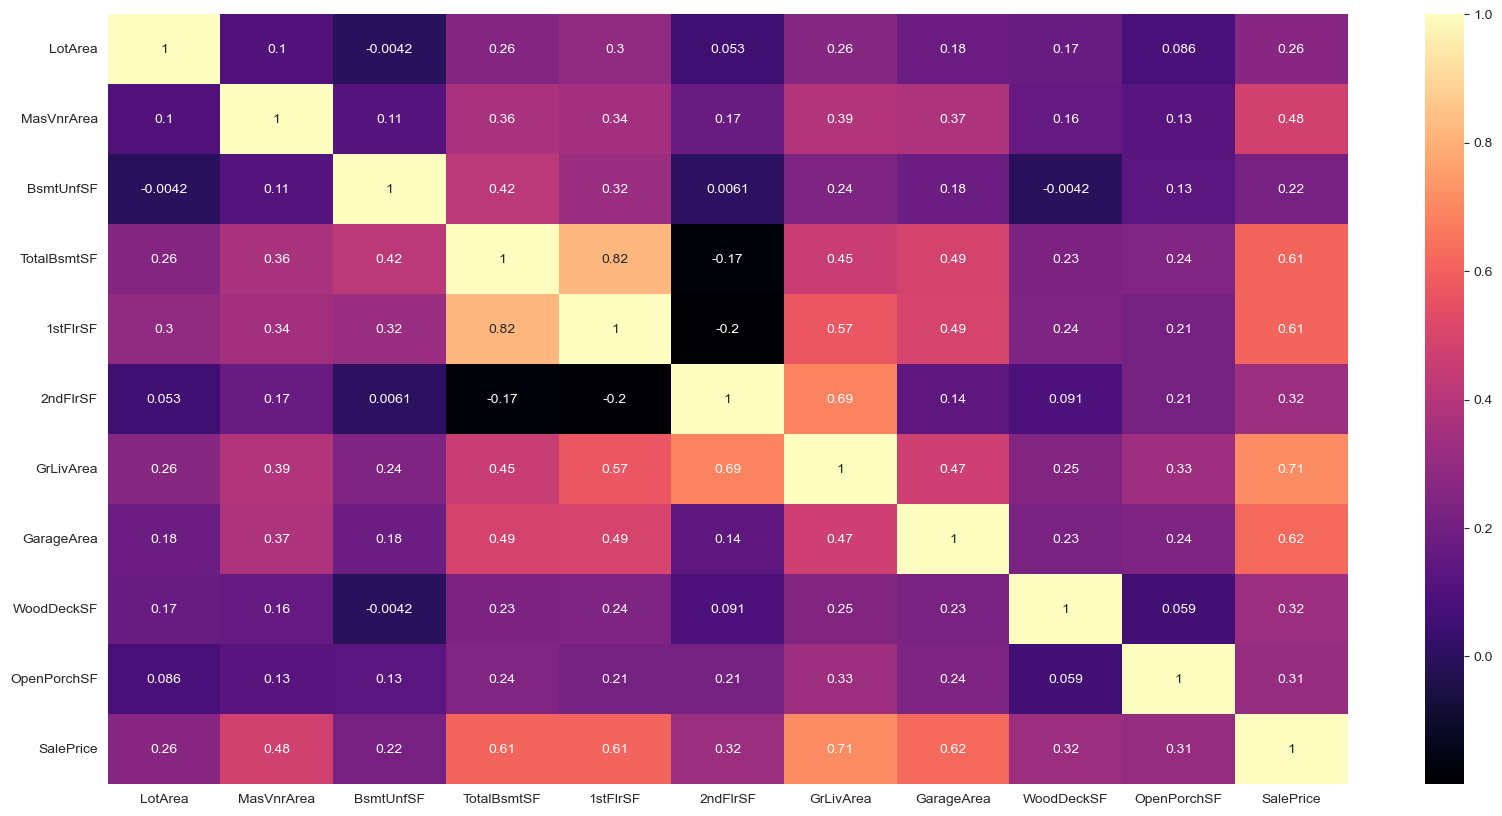

In [11]:
sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

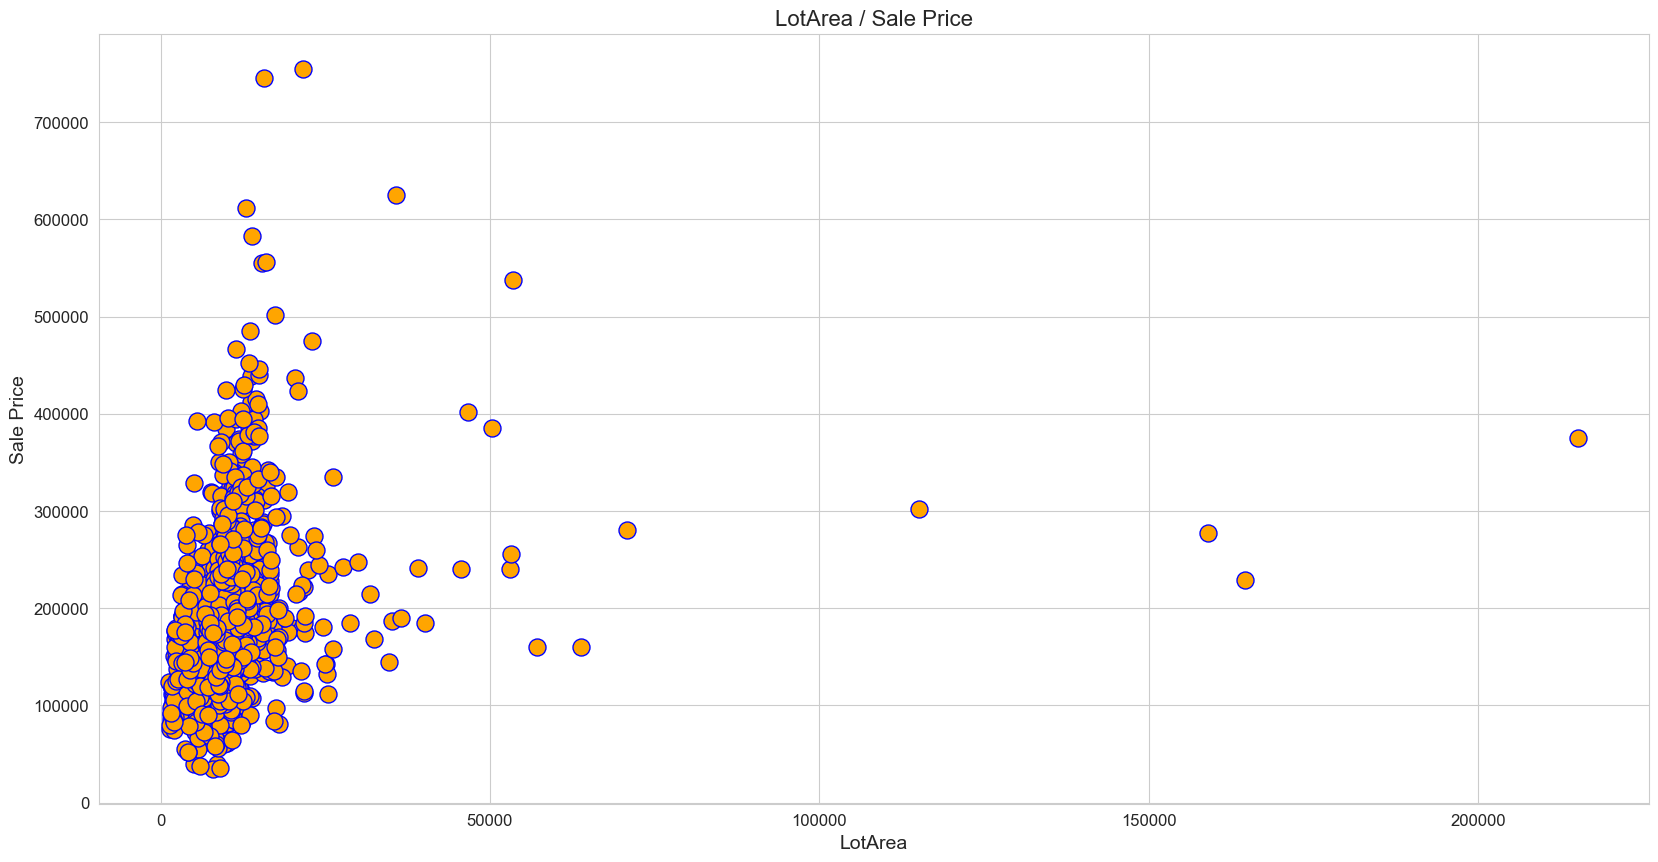

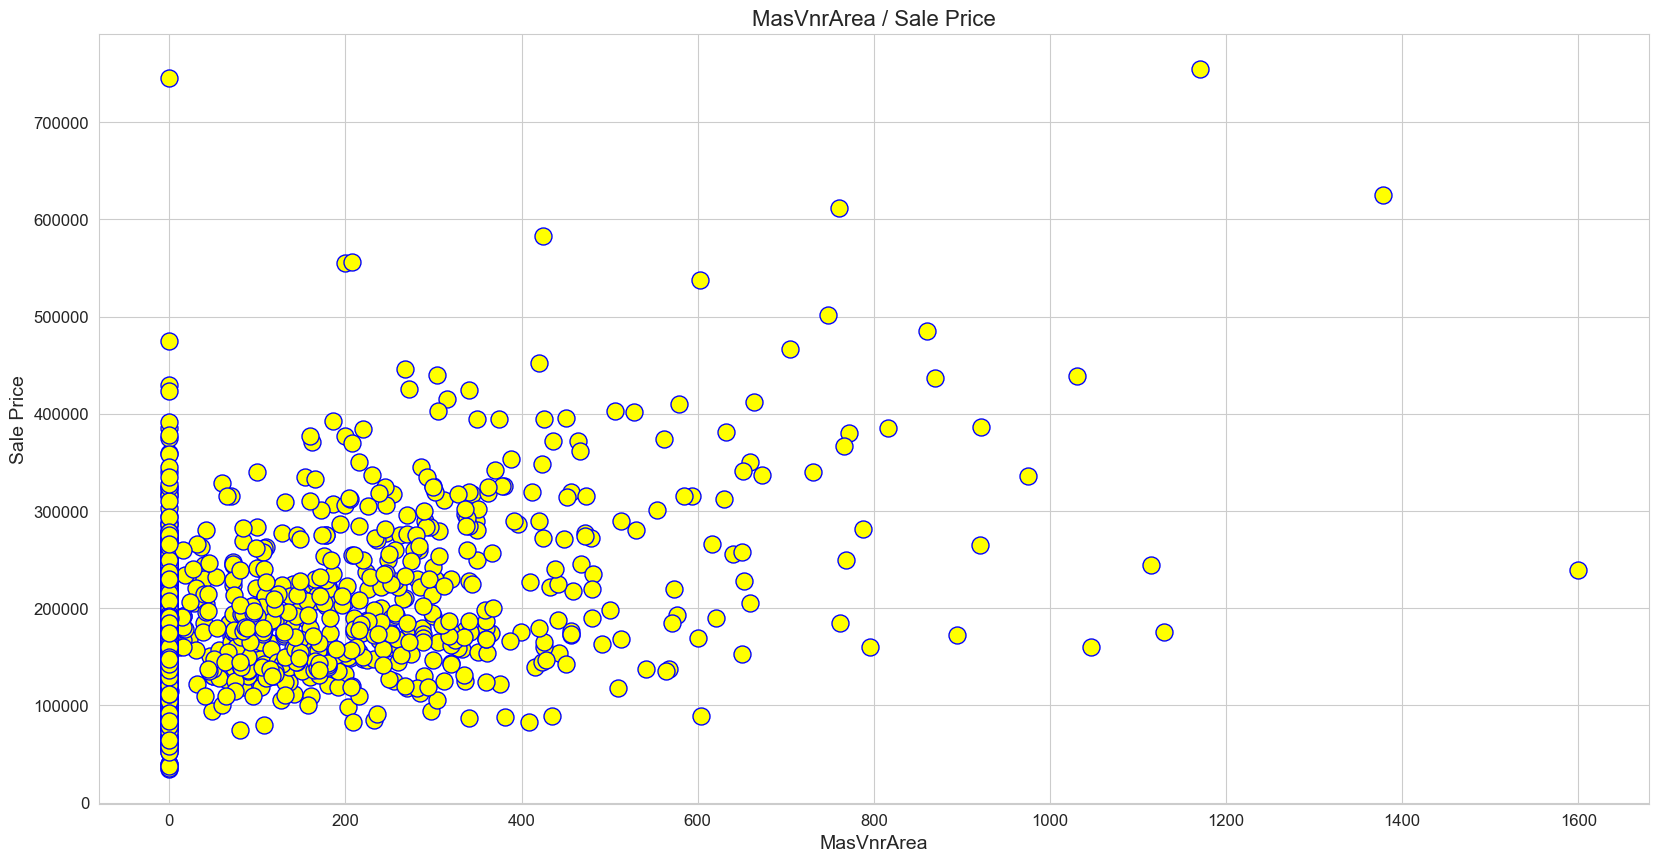

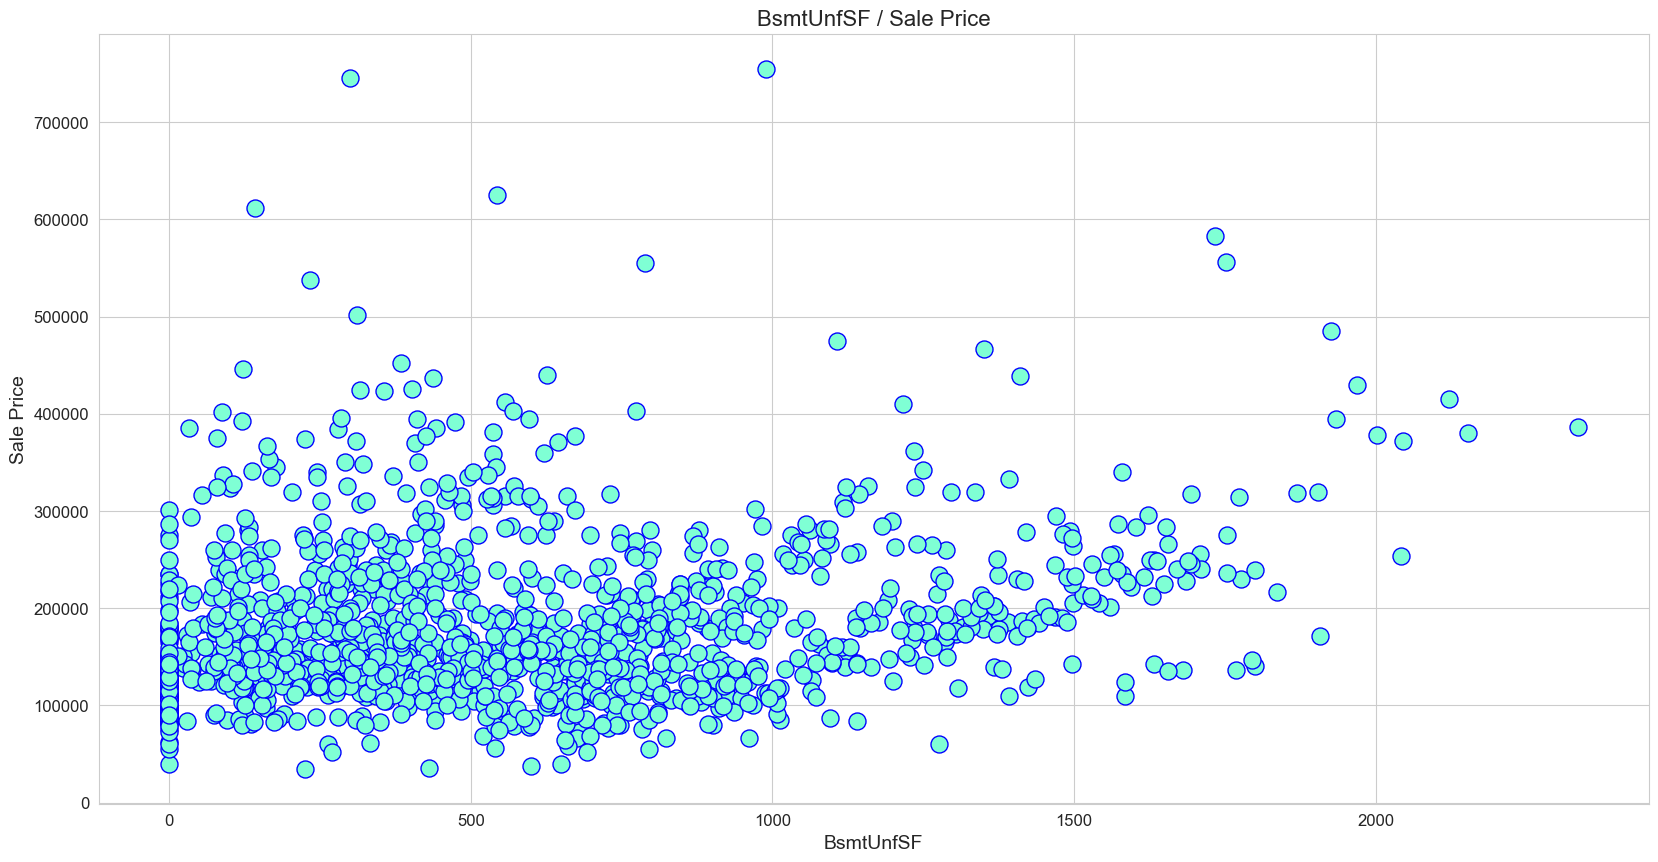

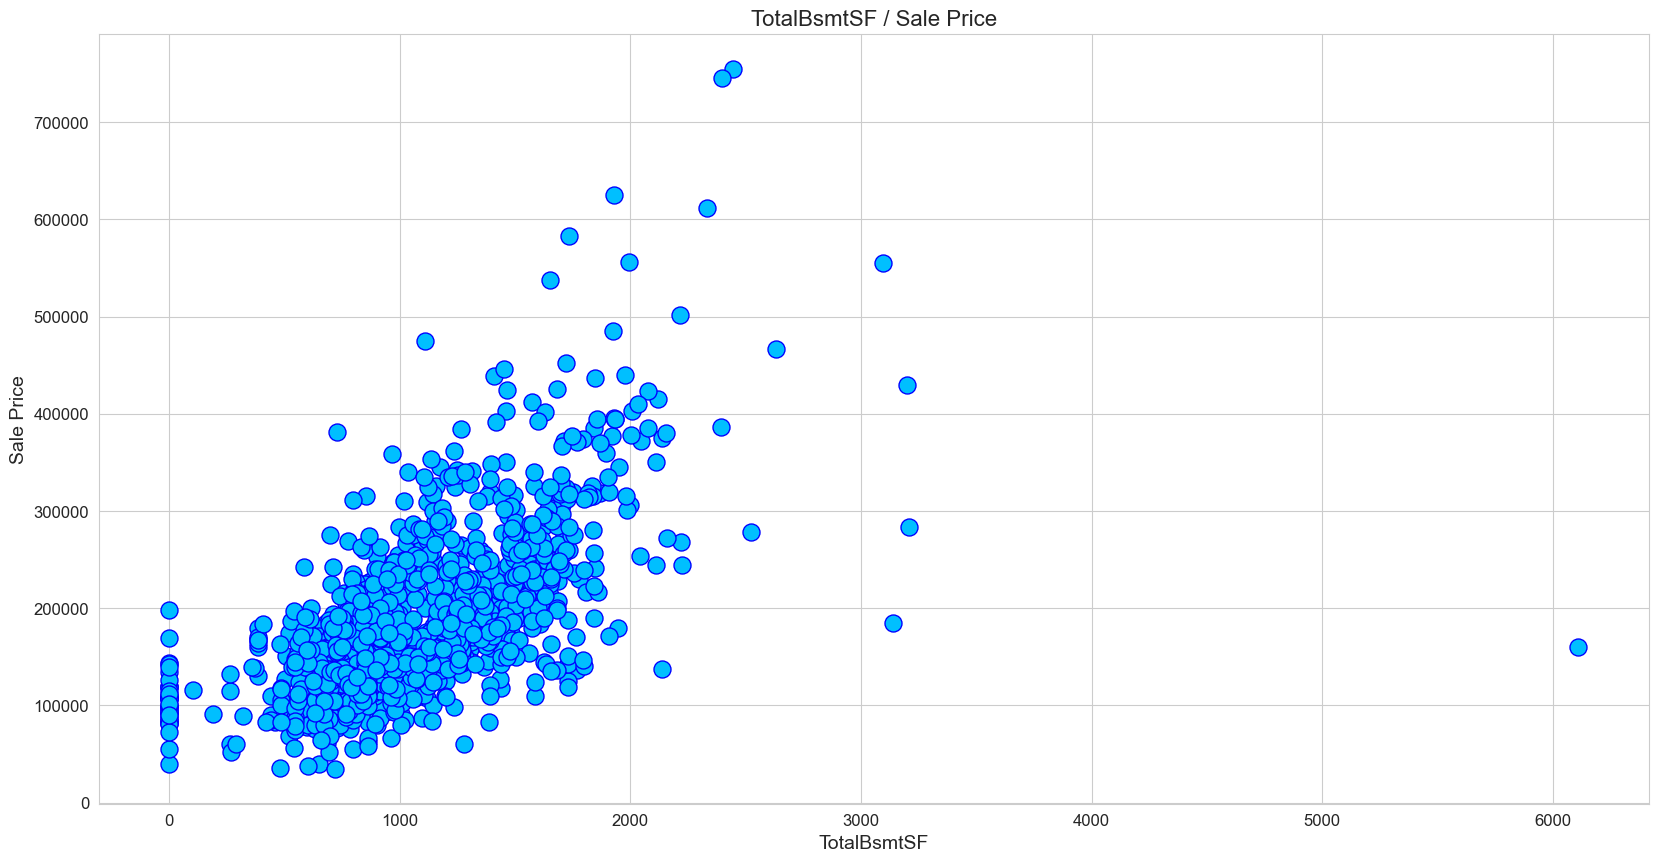

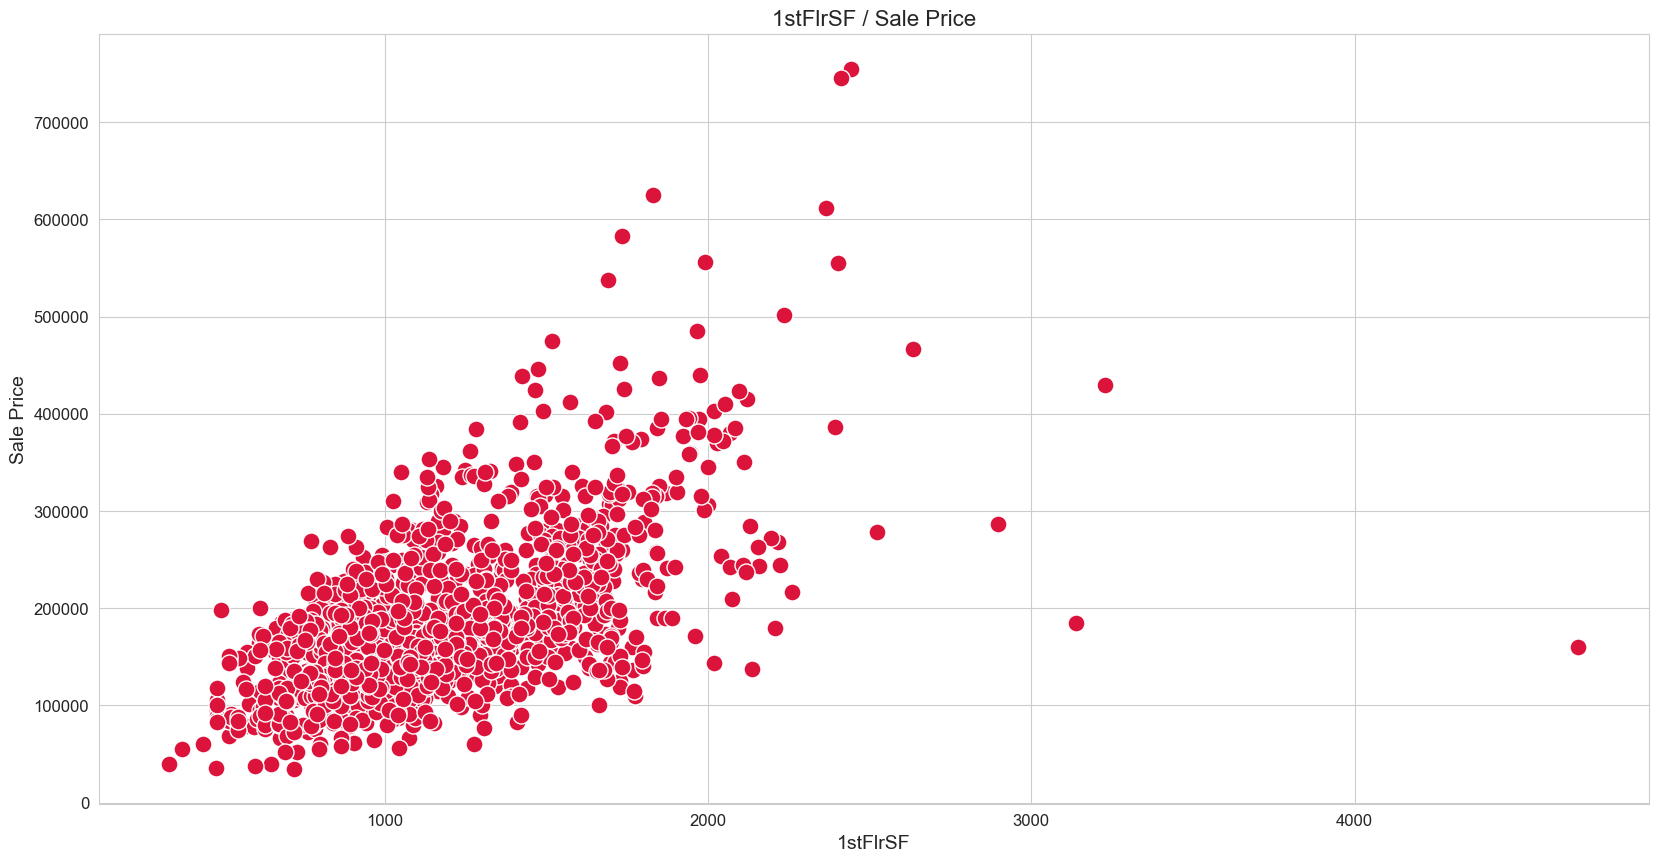

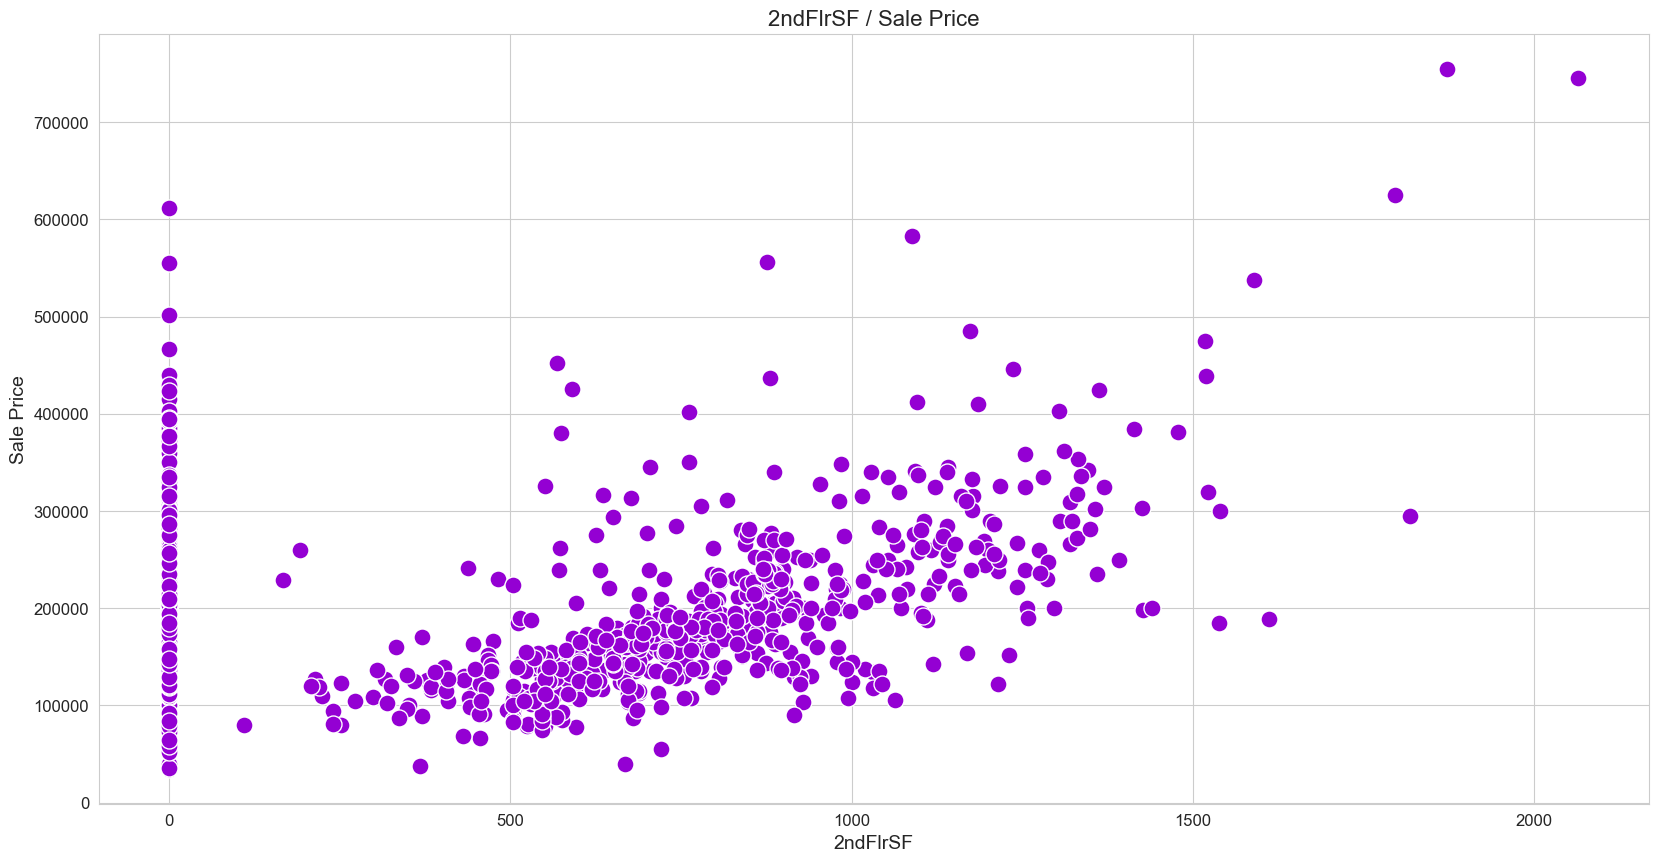

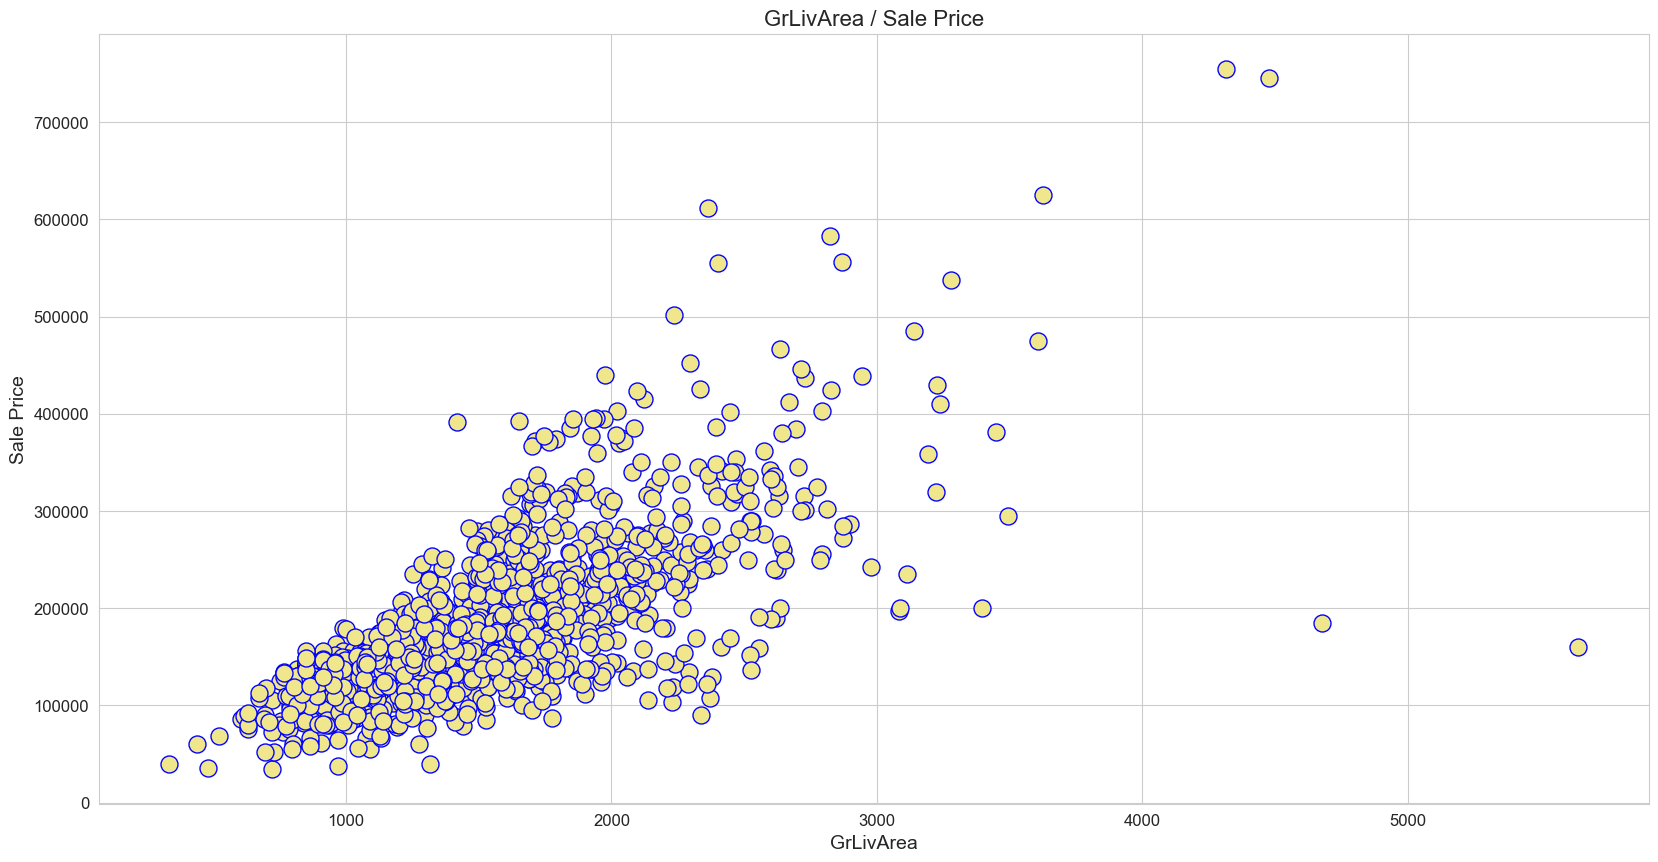

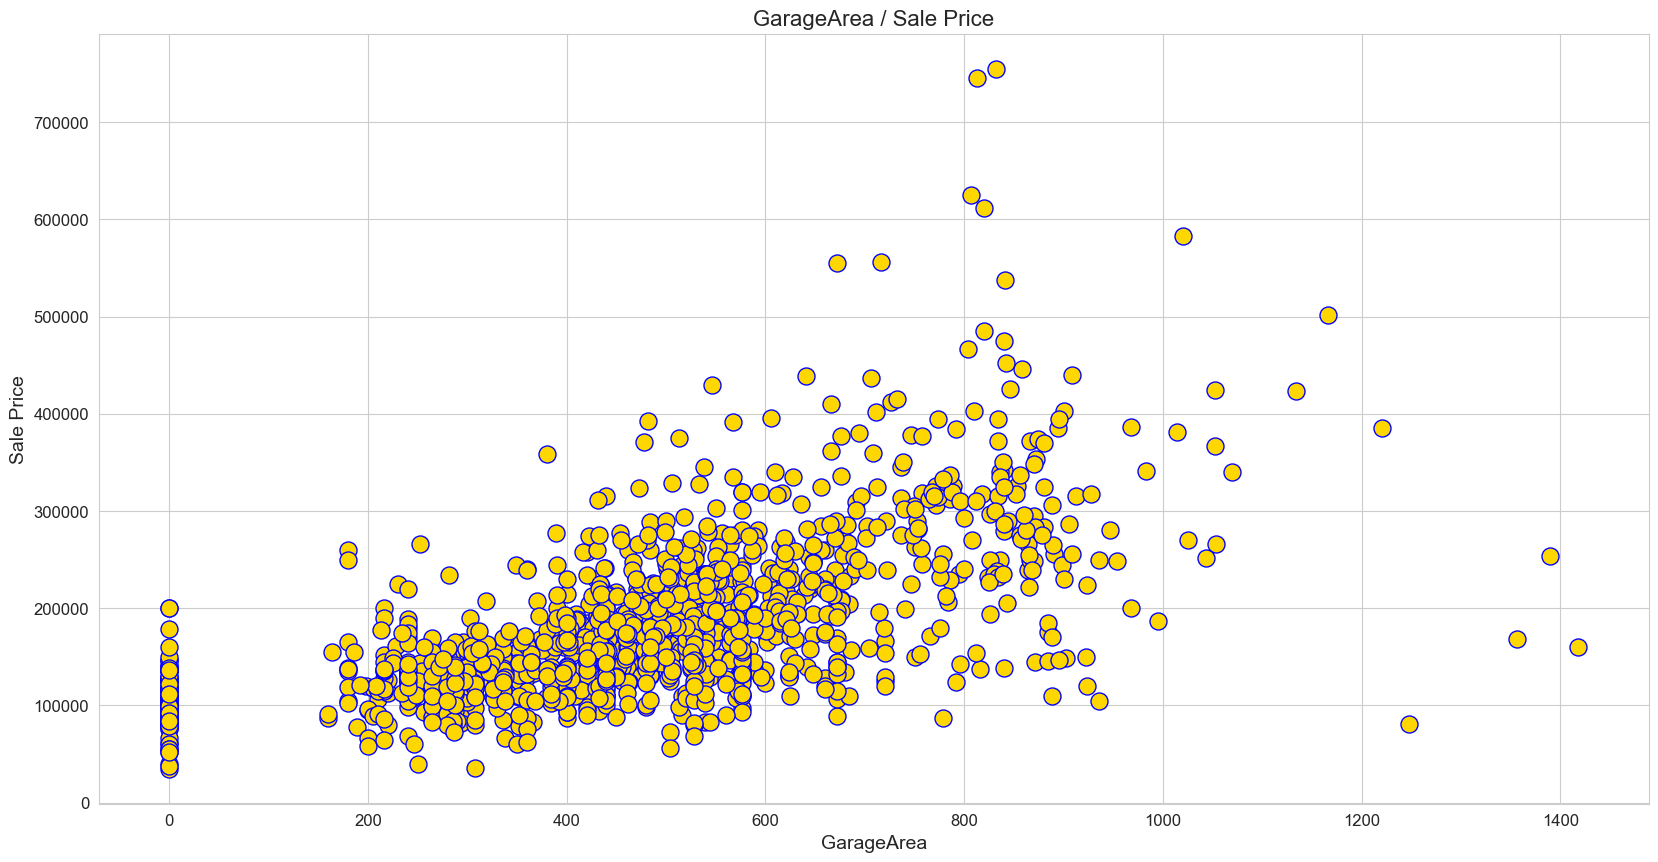

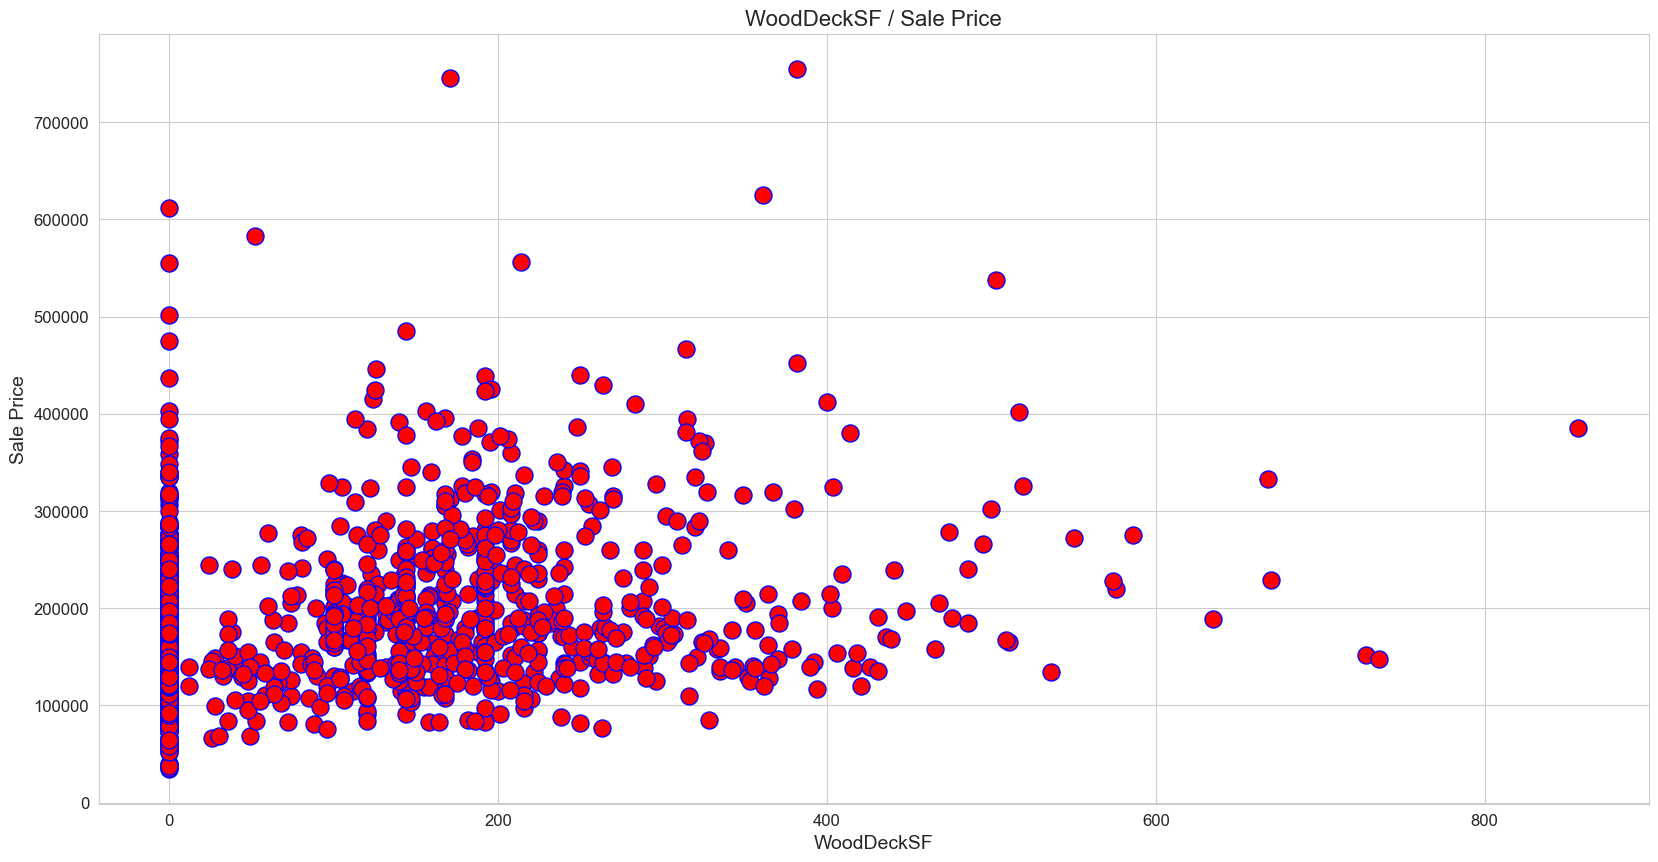

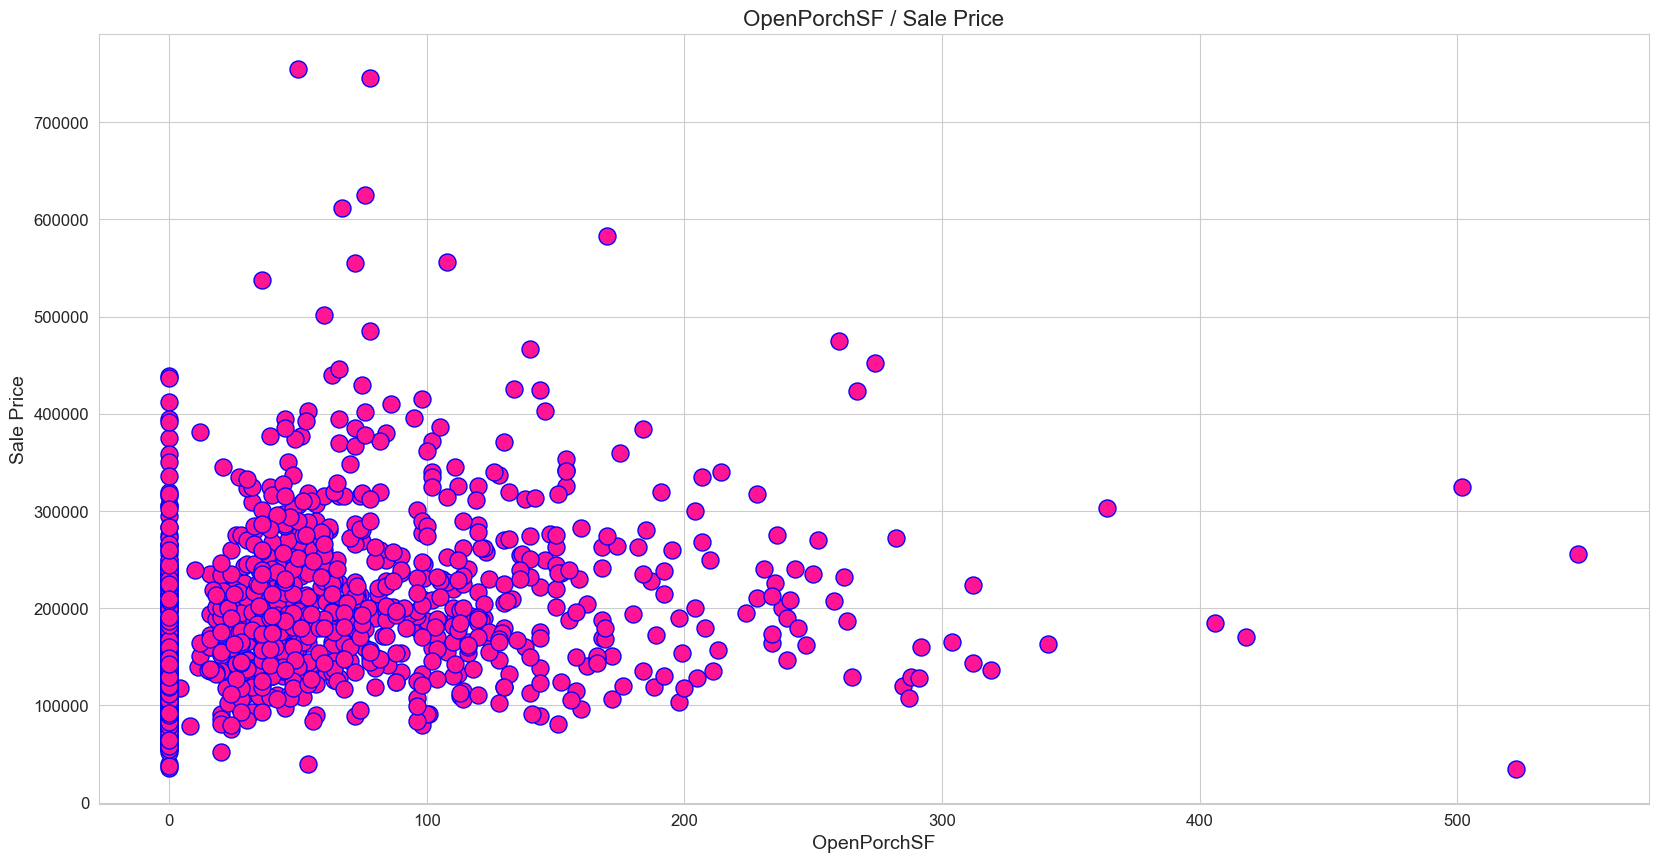

In [12]:
def scatter_df(y_var):
    
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(x = i[0], y = y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(x = i[1], y = y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sb.scatterplot(x = i[2], y = y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    plot4 = sb.scatterplot(x = i[3], y = y_var, data = df, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    plot5 = sb.scatterplot(x = i[4], y = y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} / Sale Price'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    plot6 = sb.scatterplot(x = i[5], y = y_var, data = df, color = 'darkviolet', edgecolor = 'white', s = 150)
    plt.title('{} / Sale Price'.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter6.png')
    plt.show()
    
    plot7 = sb.scatterplot(x = i[6], y = y_var, data = df, color = 'khaki', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[6]), fontsize = 16)
    plt.xlabel('{}'.format(i[6]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter7.png')
    plt.show()
    
    plot8 = sb.scatterplot(x = i[7], y = y_var, data = df, color = 'gold', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[7]), fontsize = 16)
    plt.xlabel('{}'.format(i[7]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter8.png')
    plt.show()
    
    plot9 = sb.scatterplot(x = i[8], y = y_var, data = df, color = 'r', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[8]), fontsize = 16)
    plt.xlabel('{}'.format(i[8]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter9.png')
    plt.show()
    
    plot10 = sb.scatterplot(x = i[9], y = y_var, data = df, color = 'deeppink', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[9]), fontsize = 16)
    plt.xlabel('{}'.format(i[9]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter10.png')
    plt.show()
    
scatter_df('SalePrice')
    

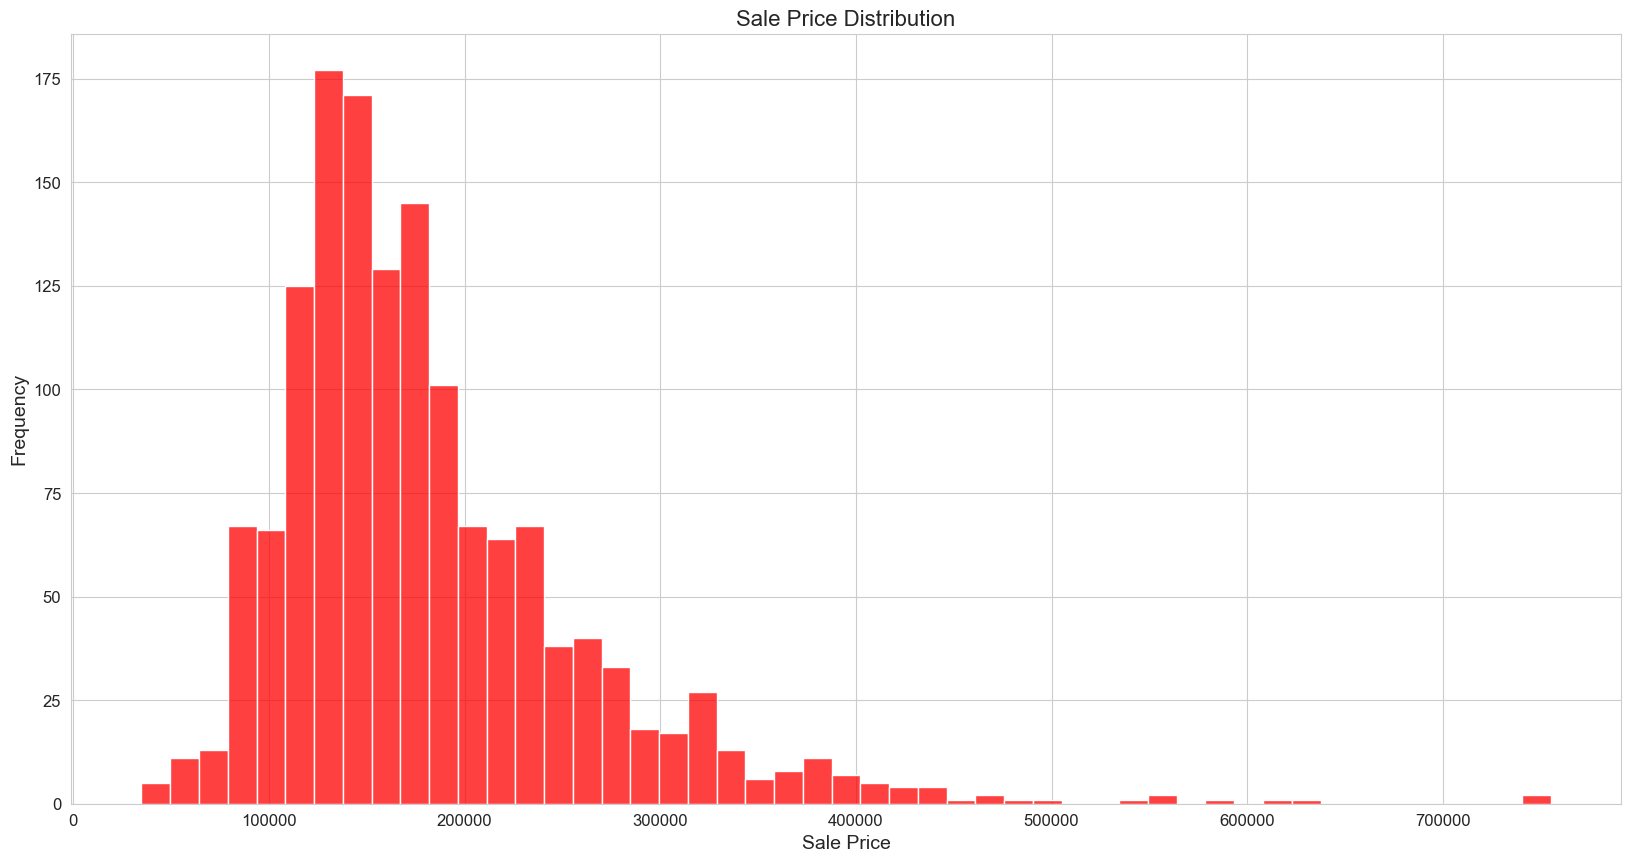

In [13]:
sb.histplot(df['SalePrice'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [14]:
# FEATURE SELECTION & DATA SPLIT

x_var = df[['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
            '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']].values

y_var = df['SalePrice'].values


x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.2, random_state = 0)

print("X_train samples: ", x_train[0:5])
print("\n\nY_train samples: ", y_train[0:5])
print("\n\nX_test samples: ", x_test[0:5])
print("\n\nY_test samples: ", y_test[0:5])



X_train samples:  [[1.02000e+04 2.19000e+02 6.78000e+02 1.46100e+03 1.50900e+03 0.00000e+00
  1.50900e+03 6.00000e+02 2.24000e+02 0.00000e+00]
 [9.94700e+03 0.00000e+00 5.77000e+02 1.18800e+03 1.21700e+03 0.00000e+00
  1.21700e+03 4.97000e+02 1.68000e+02 2.70000e+01]
 [7.20000e+03 0.00000e+00 0.00000e+00 0.00000e+00 1.04000e+03 0.00000e+00
  1.04000e+03 6.25000e+02 0.00000e+00 0.00000e+00]
 [2.15245e+05 0.00000e+00 8.00000e+01 2.13600e+03 2.03600e+03 0.00000e+00
  2.03600e+03 5.13000e+02 0.00000e+00 0.00000e+00]
 [6.12000e+03 0.00000e+00 9.52000e+02 9.52000e+02 1.02200e+03 7.52000e+02
  1.77400e+03 4.68000e+02 9.00000e+01 0.00000e+00]]


Y_train samples:  [175000 173000 109500 375000 129900]


X_test samples:  [[ 1953.   408.   174.   483.   483.   504.   987.   264.    72.     0.]
 [ 4500.   116.   319.  1216.  1216.     0.  1216.   402.     0.   125.]
 [10762.   344.   284.   978.  1005.   978.  1983.   490.     0.     0.]
 [39104.     0.    96.  1385.  1363.     0.  1363.   439.    

In [15]:
# OLS

ols = LinearRegression()
ols.fit(x_train, y_train)
ols_yhat = ols.predict(x_test)

# Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(x_train, y_train)
ridge_yhat = ridge.predict(x_test)

# Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)
lasso_yhat = lasso.predict(x_test)

# Bayesian

bayesian = BayesianRidge()
bayesian.fit(x_train, y_train)
bayesian_yhat = bayesian.predict(x_test)

# Elastic Net

en = ElasticNet(alpha = 0.01)
en.fit(x_train, y_train)
en_yhat = en.predict(x_test)

C:\Users\karthik mc\anaconda3\internship\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.209e+12, tolerance: 7.239e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\karthik mc\anaconda3\internship\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.210e+12, tolerance: 7.239e+08
  model = cd_fast.enet_coordinate_descent(


In [16]:
print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('OLS model : {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print(cl('Ridge model : {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print(cl('Lasso model : {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print(cl('Bayesian model : {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print(cl('ElasticNet model : {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
OLS model : 0.7733369645921896
Ridge model : 0.773336964594904
Lasso model : 0.7733370336570461
Bayesian model : 0.7729434024754471
ElasticNet model : 0.7733370338258722
-------------------------------------------------------------------------------


In [17]:
print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))

print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.7723836362490331
R-Squared of Ridge model is 0.7723836361689896
R-Squared of Lasso model is 0.7723836936973347
R-Squared of Bayesian model is 0.7718873625592494
R-Squared of ElasticNet is 0.7723836929218633
-------------------------------------------------------------------------------
